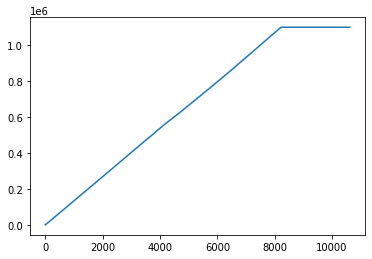

In [1]:
import pandas
import matplotlib.pyplot as plt
usecol = ["Disk_Usage", "Ref_Time"]
dataset = pandas.read_csv('rabbitmq_uncompressed_ip_rate_greater.csv', usecols=usecol, engine='python')
dataset = dataset.set_index("Ref_Time")
#dataset.head(7)
plt.plot(dataset)
plt.show()

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
dataframe = pandas.read_csv('rabbitmq_uncompressed_ip_rate_greater.csv', usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset)

[[   1208.]
 [   1208.]
 [   1510.]
 ...
 [1099809.]
 [1099809.]
 [1099809.]]


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

4302 2119


In [6]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [7]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
trainX

array([[[0.0000000e+00]],

       [[0.0000000e+00]],

       [[2.7489499e-04]],

       ...,

       [[8.5985631e-01]],

       [[8.6013663e-01]],

       [[8.6041516e-01]]], dtype=float32)

In [10]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
4300/4300 - 5s - loss: 0.0124
Epoch 2/100
4300/4300 - 4s - loss: 2.8558e-05
Epoch 3/100
4300/4300 - 5s - loss: 2.3424e-05
Epoch 4/100
4300/4300 - 4s - loss: 1.8912e-05
Epoch 5/100
4300/4300 - 4s - loss: 1.6221e-05
Epoch 6/100
4300/4300 - 4s - loss: 1.3484e-05
Epoch 7/100
4300/4300 - 4s - loss: 1.1322e-05
Epoch 8/100
4300/4300 - 4s - loss: 1.0119e-05
Epoch 9/100
4300/4300 - 4s - loss: 8.8159e-06
Epoch 10/100
4300/4300 - 4s - loss: 7.7279e-06
Epoch 11/100
4300/4300 - 4s - loss: 6.4615e-06
Epoch 12/100
4300/4300 - 4s - loss: 5.5561e-06
Epoch 13/100
4300/4300 - 4s - loss: 4.4079e-06
Epoch 14/100
4300/4300 - 4s - loss: 3.5066e-06
Epoch 15/100
4300/4300 - 4s - loss: 2.9377e-06
Epoch 16/100
4300/4300 - 4s - loss: 1.9249e-06
Epoch 17/100
4300/4300 - 4s - loss: 1.7758e-06
Epoch 18/100
4300/4300 - 4s - loss: 1.4453e-06
Epoch 19/100
4300/4300 - 4s - loss: 9.7504e-07
Epoch 20/100
4300/4300 - 5s - loss: 8.4122e-07
Epoch 21/100
4300/4300 - 4s - loss: 7.9224e-07
Epoch 22/100
4300/4300 - 4

In [11]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [12]:
trainX

array([[[0.0000000e+00]],

       [[0.0000000e+00]],

       [[2.7489499e-04]],

       ...,

       [[8.5985631e-01]],

       [[8.6013663e-01]],

       [[8.6041516e-01]]], dtype=float32)

In [13]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [14]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 540.77 RMSE
Test Score: 2077.23 RMSE


In [15]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [16]:
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [17]:
testPredictPlot

array([[      nan],
       [      nan],
       [      nan],
       ...,
       [1097543.5],
       [1097543.5],
       [      nan]], dtype=float32)

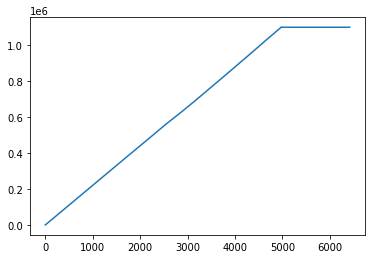

In [18]:
plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

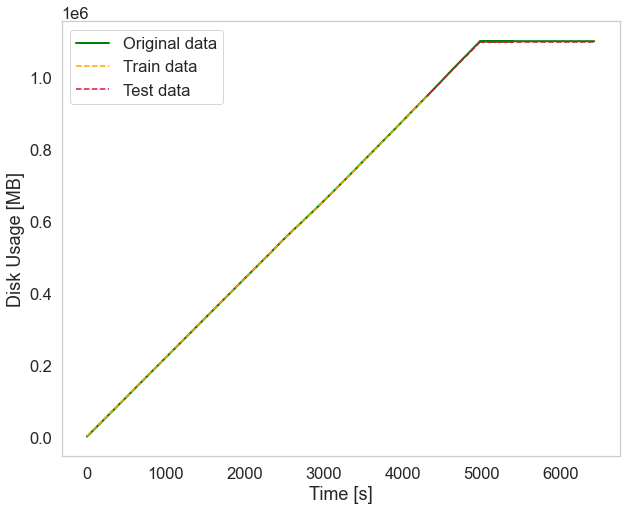

In [42]:
import seaborn as sns
fig3 = plt.figure(figsize=(10, 8))
ax = fig3.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

plt.plot(scaler.inverse_transform(dataset),color = "green", linewidth = 2)
plt.plot(trainPredictPlot, color = "orange", linestyle = "--")
plt.plot(testPredictPlot, color = "crimson", linestyle = "--")
#plt.title("RabbitMQ Model")
plt.legend(["Original data", "Train data", "Test data"])
plt.ylabel("Disk Usage [MB]")
plt.xlabel("Time [s]")

plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\plots_prediction_models\rabbitmq_lstm_model.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\plots_prediction_models\rabbitmq_lstm_model.pdf", dpi = 300)
plt.show()

In [32]:
x = [[[8.5985631e-01]],

       [[8.6013663e-01]],

       [[8.6041516e-01]]]
model.predict(x)

array([[0.85928446],
       [0.85956347],
       [0.85984063]], dtype=float32)

In [25]:
model.save("RabbitMQ_model.h5")
print("Saved model to disk")

Saved model to disk
